# Decision tree Problem

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset and convert to CSV file

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [9]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [13]:
iris_df=pd.DataFrame(data=iris.data , columns=iris.feature_names)
iris_df["target"] = iris.target

In [17]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [16]:
iris_df["target"].max() , iris_df["target"].min()

(2, 0)

In [18]:
# Split Data nto X and Y
X=iris_df.drop("target" , axis=1)
Y=iris_df["target"]

In [19]:
# train test split
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.2 , random_state=42)

## Import model and fit the data

In [20]:
#  Apply Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
treeClassifier = DecisionTreeClassifier()
treeClassifier.fit(X_train , y_train)

DecisionTreeClassifier()

In [26]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Visualize our result

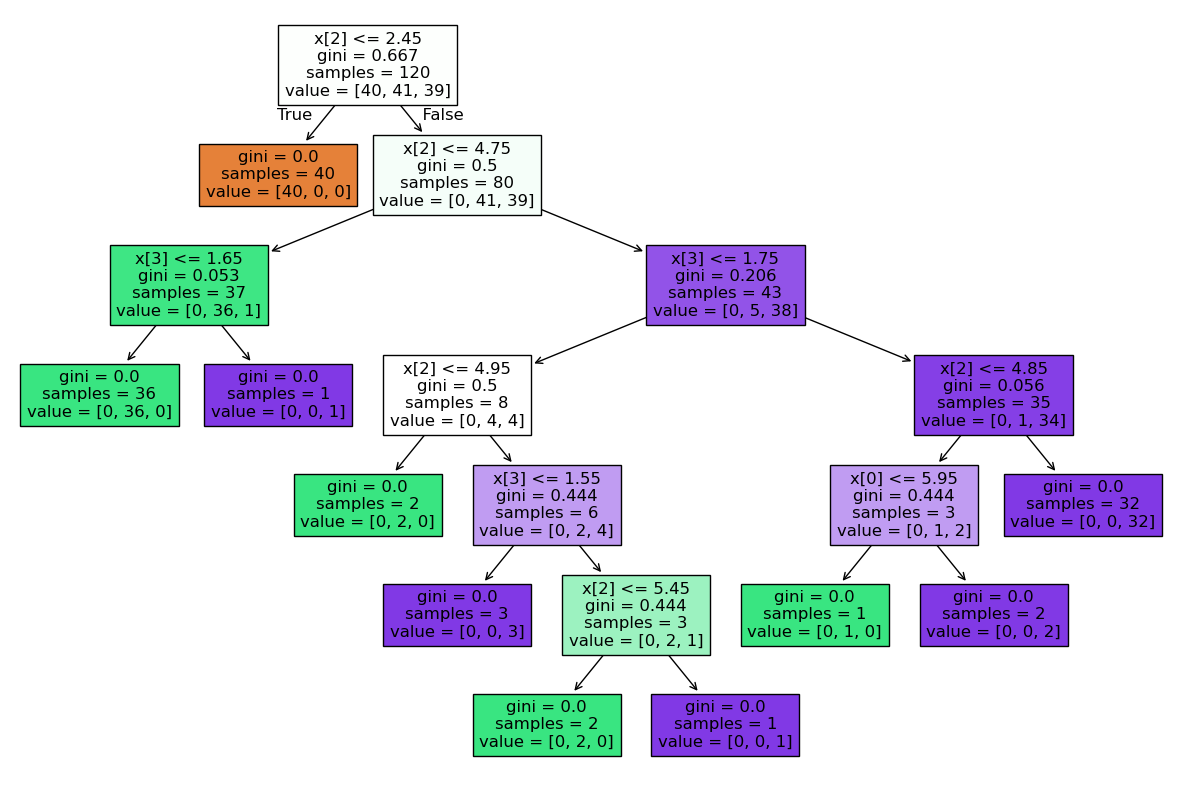

In [25]:
# Visualize the Decision tree
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeClassifier , filled=True)
plt.show()

## train data with max-depth=2

In [27]:
# we try solve problem of overfiting by using post and pre pruning and give max_depth=2
treeClassifier2 = DecisionTreeClassifier(max_depth=2)
treeClassifier2.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=2)

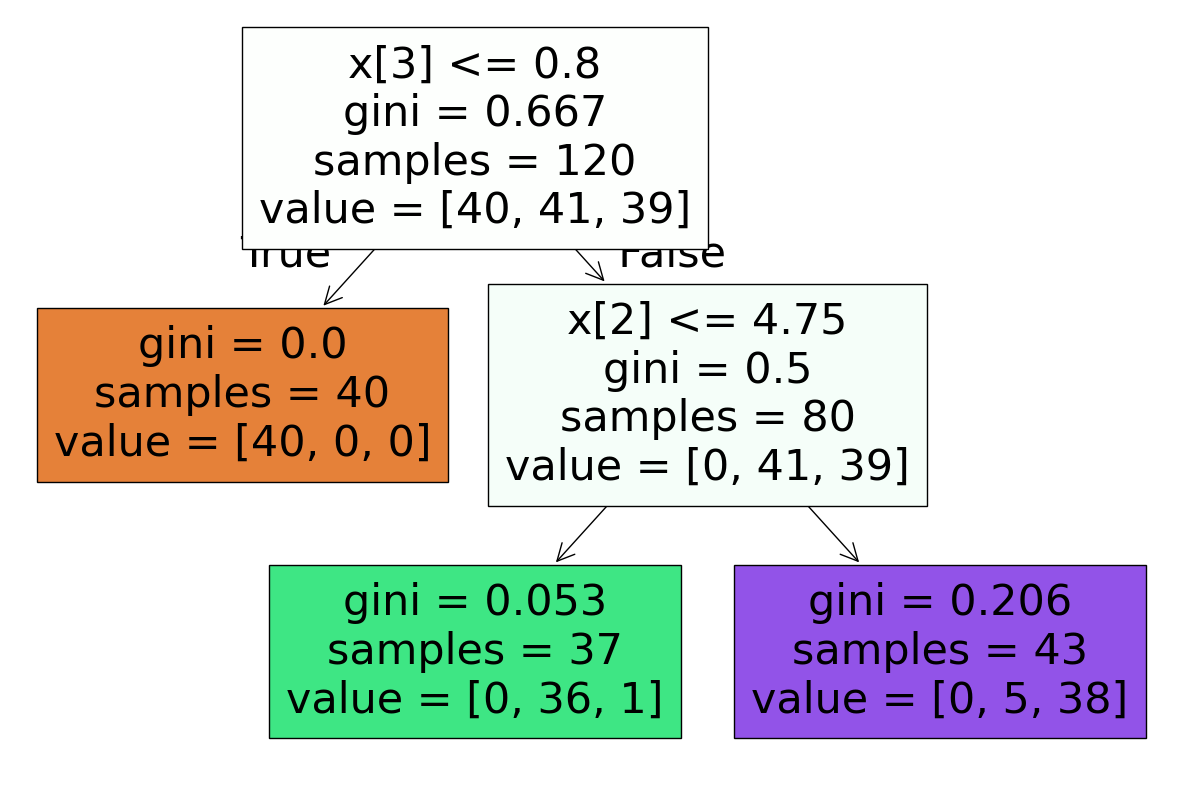

In [28]:
# Visualize the Decision tree
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeClassifier2 , filled=True)
plt.show()

## Make Prediction By and use evaluation

In [29]:
# Make some prediction
y_pred = treeClassifier2.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

In [32]:
cm = confusion_matrix(y_test , y_pred)
print(cm)

[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


In [33]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



## Decision Tree Classifier PrePruning And HyperParameter Tuning


In [34]:
from logging import critical
param = {
    "criterion" : ['gini' ,'entropy', 'log_loss'] ,
    'splitter' : ['best' , 'random'] ,
    'max_depth' : [ 2 , 3 , 4 , 5 , 6] ,
    'max_features' : [ 'auto' , 'sqrt' , 'log2'] ,
}

In [35]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=treeClassifier , param_grid=param , cv=5,scoring='accuracy')
grid_search.fit(X_train , y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/util

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [36]:
grid_search.best_score_

0.9583333333333334

In [37]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'best'}

In [38]:
y_pred_grid = grid_search.predict(X_test)

In [39]:
y_pred_grid

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [40]:
cm=confusion_matrix(y_test , y_pred_grid)
print(cm)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [41]:
print(classification_report(y_test , y_pred_grid))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

